# Equivalent layer technique for estimating total magnetization direction using a regular grid

#### Importing libraries

In [1]:
% matplotlib inline 

In [2]:
import sys
import numpy as np
import matplotlib.pyplot as plt
import cPickle as pickle
import datetime
import timeit
import string as st
from scipy.optimize import nnls
from fatiando.gridder import regular
from fatiando.utils import ang2vec, vec2ang
from fatiando.mesher import Sphere, PointGrid,Prism
from fatiando.gravmag import sphere,prism
from fatiando.constants import CM, T2NT, G, SI2MGAL

/home/andrelreis/anaconda2/lib/python2.7/site-packages/fatiando/vis/mpl.py:76: UserWarning: This module will be removed in v0.6. We recommend the use of matplotlib.pyplot module directly. Some of the fatiando specific functions will remain.
  "specific functions will remain.")


In [3]:
notebook_name = 'regular_EQL_magdirection_IM.ipynb'

#### Importing auxiliary functions

In [4]:
dir_modules = '../../mypackage'
sys.path.append(dir_modules)

In [5]:
import auxiliary_functions as fc

#### Loading properties of the model

In [6]:
with open('data/model_polyprism.pickle') as f:
        model_polyprism = pickle.load(f)

#### Loading properties grid

In [7]:
with open('data/regular_grid.pickle') as f:
        reg_grid = pickle.load(f)

#### Loading data

In [8]:
with open('data/data_set.pickle') as f:
        data = pickle.load(f)

#### Open a dictionary

In [9]:
result_IM_reg = dict()

### Saving files

In [10]:
saved_files = []

## Observation area

In [11]:
print 'Area limits: \n x_max = %.1f m \n x_min = %.1f m \n y_max = %.1f m \n y_min = %.1f m' % (reg_grid['area'][1], 
                                                                                                reg_grid['area'][0],
                                                                                                reg_grid['area'][3],
                                                                                                reg_grid['area'][2])

Area limits: 
 x_max = 6000.0 m 
 x_min = -6000.0 m 
 y_max = 6000.0 m 
 y_min = -6000.0 m


### reg_grid survey information

In [12]:
print 'Shape : (%.0f,%.0f)'% reg_grid['shape'] 
print 'Number of data: %.1f' % reg_grid['N']
print 'dx: %.1f m' % reg_grid['dx']
print 'dy: %.1f m ' % reg_grid['dy']

Shape : (25,25)
Number of data: 625.0
dx: 500.0 m
dy: 500.0 m 


## Properties of the model

### Main field

In [13]:
inc_gf,dec_gf = model_polyprism['main_field']

In [14]:
print'Main field inclination: %.1f degree' % inc_gf
print'Main field declination: %.1f degree' % dec_gf

Main field inclination: 30.0 degree
Main field declination: 30.0 degree


### Magnetization direction

In [15]:
print 'Intensity: %.1f A/m' % model_polyprism['m_I']
print 'Inclination: %.1f degree' % model_polyprism['inc_I']
print 'Declination: %.1f degree' % model_polyprism['dec_I']

Intensity: 5.0 A/m
Inclination: 30.0 degree
Declination: 30.0 degree


In [16]:
inc_I,dec_I = model_polyprism['inc_I'],model_polyprism['dec_I']

## Generating the layer with my function 

In [17]:
h = 750.

#### Generating a layer

In [18]:
shape_layer = (reg_grid['shape'][0],reg_grid['shape'][1])

In [19]:
xs,ys,zs = regular(reg_grid['area'],shape_layer,h)

### Levenberg-Marquardt with NNLS for positive magnetic moments

In [20]:
i_pos = 1500

In [21]:
it_max = 30

In [22]:
it_marq = 15

In [23]:
lamb = 10.
dlamb = 100.

In [24]:
eps_e = 1e-5
eps_i = 1e-5

In [25]:
mu_pos = 1e2

In [26]:
m_LM,inc_est,dec_est,phi,imax,pest,incs,decs = fc.levenberg_marquardt_NNLS(
    data['tfa_obs_polyprism_IM_reg'],reg_grid['x'],reg_grid['y'],
    reg_grid['z'],xs,ys,zs,inc_gf,dec_gf,-10.,-10.,lamb,dlamb,i_pos,it_max,
    it_marq,eps_e,eps_i,mu_pos)

i = 0
1.00742508752e-13
-4.84556441174 -1.99295244153
0.254581979919
i = 1
1.04794693075e-13
0.570588549477 4.0356897696
0.355245657137
i = 2
1.07168326061e-13
4.82578993162 7.71381581318
0.353182034375
i = 3
1.08499397459e-13
7.80242295499 10.295429519
0.267023229648
i = 4
1.09606342811e-13
10.0075832436 12.3715907031
0.207284126541
i = 5
1.10585166256e-13
11.736812665 14.1317085202
0.171275339114
i = 6
1.11436894557e-13
13.1368611959 15.6614139989
0.145938105148
i = 7
1.12171205691e-13
14.2962850872 17.0247222333
0.127754899455
i = 8
1.12806861278e-13
15.2726279576 18.2451306038
0.113051217967
i = 9
1.13353563484e-13
16.1100608329 19.3441726627
0.101718004296
i = 10
1.13824459908e-13
16.8348912664 20.3134092364
0.0912625228063
i = 11
1.14224572288e-13
17.4690800495 21.1776052747
0.0812889564469
i = 12
1.14568444563e-13
18.0290456769 21.9481149488
0.0723398392648
i = 13
1.14865485404e-13
18.5280369318 22.6341498579
0.064308339046
i = 14
1.1512366328e-13
18.9780590739 23.2533239409
0.0

28.4139258312 31.6535004531
0.000665278620585
i = 119
1.20008832874e-13
28.4411926092 31.6539532668
0.000653484804482
i = 120
1.20026317062e-13
28.468204196 31.6543625624
0.000641897706779
i = 121
1.20043665646e-13
28.4949631928 31.6547289212
0.000630513700685
i = 122
1.20060879538e-13
28.5214721663 31.655052923
0.000619329227646
i = 123
1.20077959643e-13
28.5477336497 31.6553351463
0.000608340795715
i = 124
1.20094906864e-13
28.5737501429 31.6555761677
0.000597544977961
i = 125
1.20111722095e-13
28.5995232676 31.6557790764
0.000586902848162
i = 126
1.20128405466e-13
28.6250550322 31.6559456856
0.00057642930725
i = 127
1.20144957478e-13
28.6503533026 31.6560757663
0.000566383577317
i = 128
1.20161382628e-13
28.6754246576 31.6561692685
0.000556700876335
i = 129
1.2017768459e-13
28.7002714234 31.6562272768
0.000547188310095
i = 130
1.201938642e-13
28.7248973999 31.6562506094
0.000537908194916
i = 131
1.20209923293e-13
28.7493004153 31.656254193
0.000528613589148
i = 132
1.20225858631e-13

30.3521740596 31.5310335655
8.97732931934e-05
i = 234
1.21325556689e-13
30.3619976016 31.5290501622
8.82839905704e-05
i = 235
1.21332645773e-13
30.3717385266 31.5270750584
8.68139850622e-05
i = 236
1.2133967879e-13
30.3813974916 31.5251082912
8.53676309497e-05
i = 237
1.21346656124e-13
30.3909751488 31.5231498964
8.39445690367e-05
i = 238
1.2135357816e-13
30.4004721458 31.5211999088
8.25444450441e-05
i = 239
1.2136044528e-13
30.4098891256 31.5192583617
8.1166909559e-05
i = 240
1.21367257864e-13
30.4192265423 31.5173247338
7.98086546372e-05
i = 241
1.21374016203e-13
30.4284846488 31.515397925
7.84662948543e-05
i = 242
1.21380720492e-13
30.4376640844 31.5134780227
7.71458108675e-05
i = 243
1.21387371109e-13
30.4467654836 31.5115651119
7.5846864423e-05
i = 244
1.21393968429e-13
30.4557894764 31.5096592748
7.45691220289e-05
i = 245
1.21400512825e-13
30.4647366883 31.5077605908
7.33122549013e-05
i = 246
1.21407004668e-13
30.4736077401 31.5058691369
7.20759389255e-05
i = 247
1.2141344433e-13

31.0786041644 31.3515174034
1.46644571027e-05
i = 349
1.21860050368e-13
31.0825620489 31.3500485413
1.45194589439e-05
i = 350
1.21863040765e-13
31.0864994449 31.3485695463
1.43761351308e-05
i = 351
1.21866017394e-13
31.0904164884 31.3470808068
1.42344574393e-05
i = 352
1.21868980316e-13
31.094313314 31.3455827023
1.40943984016e-05
i = 353
1.21871929595e-13
31.0981900547 31.3440756035
1.39559312947e-05
i = 354
1.21874865291e-13
31.1020468423 31.3425598731
1.38190301043e-05
i = 355
1.21877787466e-13
31.1058838071 31.3410358654
1.36836695062e-05
i = 356
1.21880696181e-13
31.1097022974 31.3395051942
1.35577632782e-05
i = 357
1.21883592294e-13
31.1135026655 31.3379684042
1.34347210898e-05
i = 358
1.21886476016e-13
31.1172850178 31.336425773
1.3312922482e-05
i = 359
1.21889347397e-13
31.1210494597 31.3348775723
1.3192350133e-05
i = 360
1.21892206486e-13
31.1247960956 31.3333240673
1.30729871199e-05
i = 361
1.21895053336e-13
31.1285250289 31.3317655175
1.29548169133e-05
i = 362
1.21897887994e

### Visualization of the convergence

In [27]:
phi = (np.array(phi)/reg_grid['x'].size)

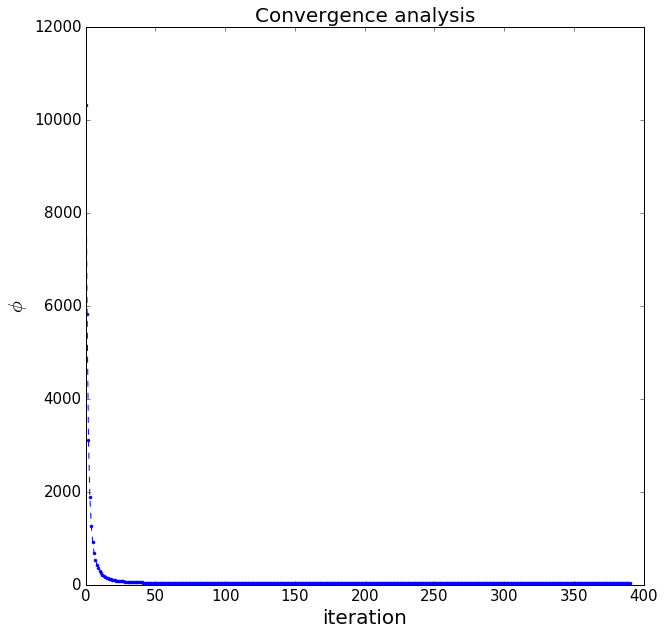

In [28]:
title_font = 20
bottom_font = 18
saturation_factor = 1.
plt.close('all')
plt.figure(figsize=(9,9), tight_layout=True)

plt.figure(figsize=(10, 10))
plt.plot(phi, 'b--')
plt.plot(phi, 'b.')

plt.title('Convergence analysis', fontsize=title_font)
plt.xlabel('iteration', fontsize = title_font)
plt.ylabel('$\phi$', fontsize = title_font)
plt.tick_params(axis='both', which='major', labelsize=15)

file_name = 'figs/regular/convergence_LM_NNLS_magIM'
plt.savefig(file_name+'.png',dpi=300)
saved_files.append(file_name+'.png')

plt.savefig(file_name+'.eps',dpi=300)
saved_files.append(file_name+'.eps')


plt.show()

### Estimated magnetization direction

In [29]:
print (inc_est,dec_est)

(31.226137162326985, 31.286982491403382)


In [30]:
print (inc_I,dec_I)

(30.0, 30.0)


### Comparison between observed data and predicted data

In [31]:
pred = fc.tfa_layer(reg_grid['x'],reg_grid['y'],reg_grid['z'],
                    xs,ys,zs,inc_gf,dec_gf,m_LM,inc_est,dec_est)

In [32]:
res = pred - data['tfa_obs_polyprism_IM_reg']

In [33]:
r_norm,r_mean,r_std = fc.residual(data['tfa_obs_polyprism_IM_reg'],pred)

/home/andrelreis/anaconda2/lib/python2.7/site-packages/matplotlib/figure.py:1744: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


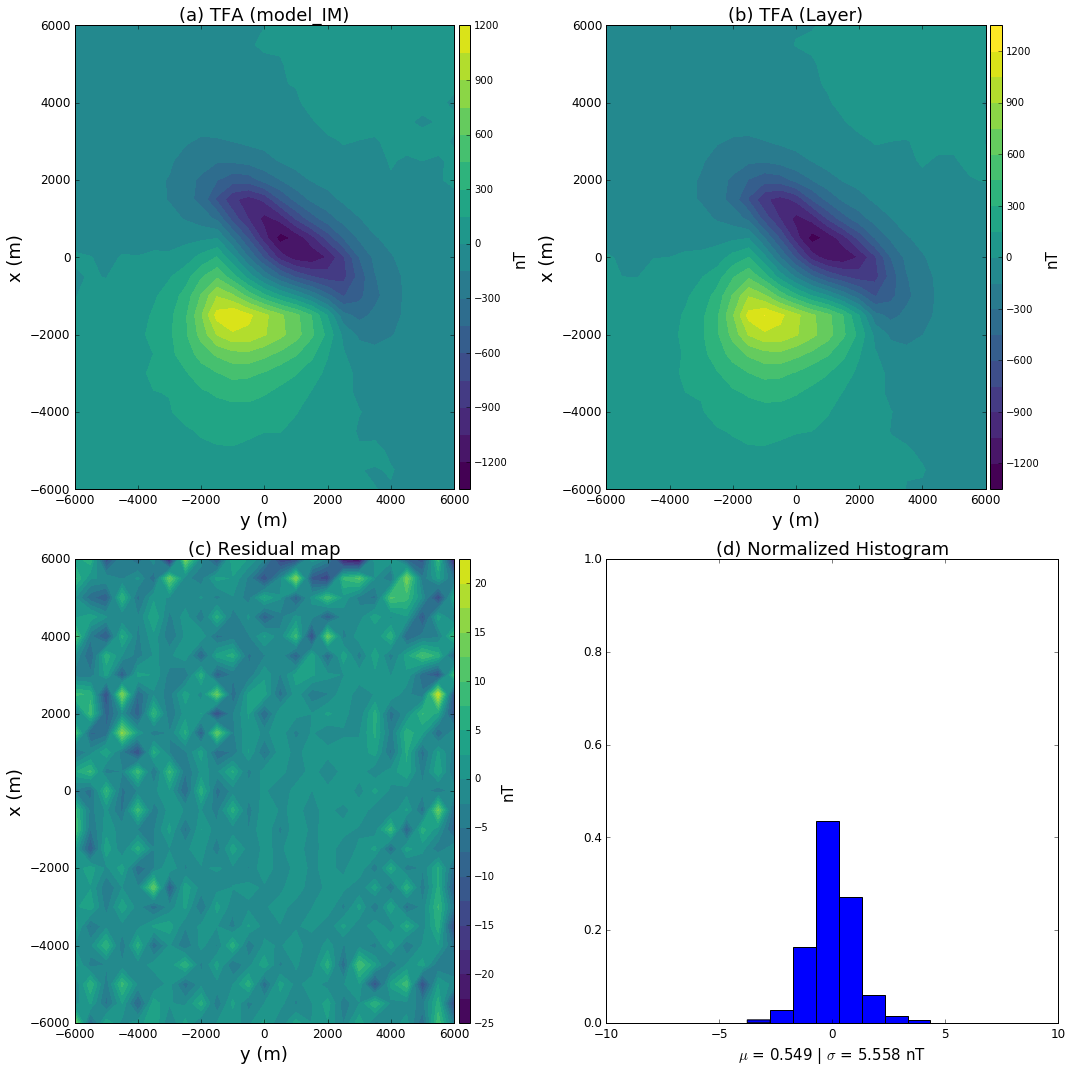

In [34]:
title_font = 18
bottom_font = 15
saturation_factor = 1.
plt.close('all')
plt.figure(figsize=(15,15), tight_layout=True)

ranges = saturation_factor*np.abs([data['tfa_obs_polyprism_IM_reg'].max(), 
                                   data['tfa_obs_polyprism_IM_reg'].min(),
                                   pred.max(), pred.min()]).max()
res_ranges = np.max(np.abs(res))

plt.subplot(2,2,1)
plt.contourf(reg_grid['y'].reshape(reg_grid['shape']),
             reg_grid['x'].reshape(reg_grid['shape']), 
             data['tfa_obs_polyprism_IM_reg'].reshape(reg_grid['shape']),
             20, cmap='viridis',vmin=-ranges, vmax=ranges)
plt.colorbar(pad=0.01, aspect=40, shrink=1.0).set_label('nT',size=bottom_font)
plt.xlabel('y (m)', fontsize = title_font)
plt.ylabel('x (m)', fontsize = title_font)
plt.title('(a) TFA (model_IM)',fontsize=title_font)
plt.tick_params(axis='both', which='major', labelsize=12)

plt.subplot(2,2,2)
plt.contourf(reg_grid['y'].reshape(reg_grid['shape']),
             reg_grid['x'].reshape(reg_grid['shape']),
             pred.reshape(reg_grid['shape']),
             20, cmap='viridis',  vmin=-ranges, vmax=ranges)
plt.colorbar(pad=0.01, aspect=40, shrink=1.0).set_label('nT',size=bottom_font)
plt.xlabel('y (m)', fontsize = title_font)
plt.ylabel('x (m)', fontsize = title_font)
plt.title('(b) TFA (Layer)', fontsize=title_font)
plt.tick_params(axis='both', which='major', labelsize=12)

plt.subplot(2,2,3)
plt.contourf(reg_grid['y'].reshape(reg_grid['shape']),
             reg_grid['x'].reshape(reg_grid['shape']),
             res.reshape(reg_grid['shape']), 
             20, cmap='viridis',  vmin=-res_ranges, vmax=res_ranges)
plt.colorbar(pad=0.01, aspect=40, shrink=1.0).set_label('nT',size=bottom_font)
plt.xlabel('y (m)', fontsize = title_font)
plt.ylabel('x (m)', fontsize = title_font)
plt.title('(c) Residual map', fontsize=title_font)
plt.tick_params(axis='both', which='major', labelsize=12)


plt.subplot(2,2,4)
plt.xlabel('$\mu$ = %.3f | $\sigma$ = %.3f nT' % (r_mean, r_std),
           fontsize = bottom_font)
nbins = int((np.max(r_norm - np.min(r_norm))))
plt.hist(r_norm,bins=nbins,normed=True)
plt.ylim(0.,1.)
plt.xlim(-10., 10.)
plt.title('(d) Normalized Histogram',fontsize=title_font)
plt.tick_params(axis='both', which='major', labelsize=12)

file_name = 'figs/regular/data_fitting_LM_NNLS_magIM'
plt.savefig(file_name+'.png',dpi=300)
saved_files.append(file_name+'.png')

plt.savefig(file_name+'.eps',dpi=300)
saved_files.append(file_name+'.eps')


plt.show()

### Estimated magnetic moment within the layer

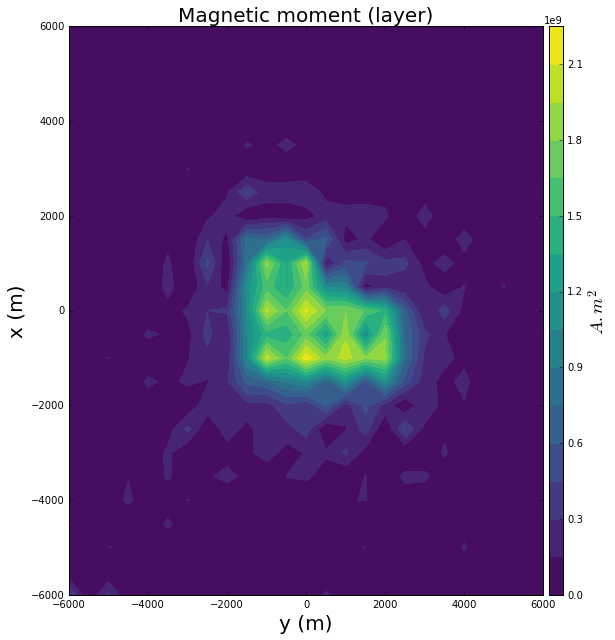

In [35]:
title_font = 20
bottom_font = 18
saturation_factor = 1.
plt.close('all')
plt.figure(figsize=(9,9), tight_layout=True)

plt.contourf(ys.reshape(shape_layer),xs.reshape(shape_layer), 
             m_LM.reshape(shape_layer), 20, cmap='viridis')
plt.colorbar(pad=0.01, aspect=40, shrink=1.0).set_label('$A.m^2$',size=bottom_font)
plt.xlabel('y (m)', fontsize = title_font)
plt.ylabel('x (m)', fontsize = title_font)
plt.title('Magnetic moment (layer)', fontsize=title_font)

file_name = 'figs/regular/magnetic_moment_positive_LM_NNLS_magIM'
plt.savefig(file_name+'.png',dpi=300)
saved_files.append(file_name+'.png')

plt.savefig(file_name+'.eps',dpi=300)
saved_files.append(file_name+'.eps')


plt.show()

### Reduction to the pole

In [36]:
G_rtp = fc.sensitivity_mag(reg_grid['x'],reg_grid['y'],reg_grid['z'],
                       xs,ys,zs,90.,0.,90.,0.)

In [37]:
tfa_rtp = np.dot(G_rtp,m_LM)

#### Visualization of a reduction to the pole

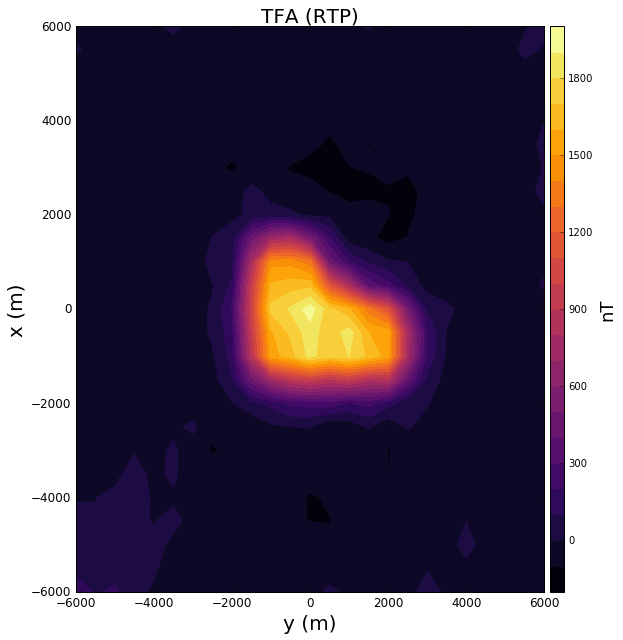

In [38]:
title_font = 20
bottom_font = 18
saturation_factor = 1.
plt.close('all')
plt.figure(figsize=(9,9), tight_layout=True)

plt.contourf(reg_grid['y'].reshape(reg_grid['shape']), 
             reg_grid['x'].reshape(reg_grid['shape']),
             tfa_rtp.reshape(reg_grid['shape']), 
             20, cmap='inferno')
plt.colorbar(pad=0.01, aspect=40, shrink=1.0).set_label('nT',size=bottom_font)
plt.xlabel('y (m)', fontsize = title_font)
plt.ylabel('x (m)', fontsize = title_font)
plt.title('TFA (RTP)', fontsize=title_font)
plt.tick_params(axis='both', which='major', labelsize=12)

file_name = 'figs/regular/RTP_reg_grid_magIM'
plt.savefig(file_name+'.png',dpi=300)
saved_files.append(file_name+'.png')

plt.savefig(file_name+'.eps',dpi=300)
saved_files.append(file_name+'.eps')

plt.show()

# Visualization of the RTP and Magnetic moment over the layer

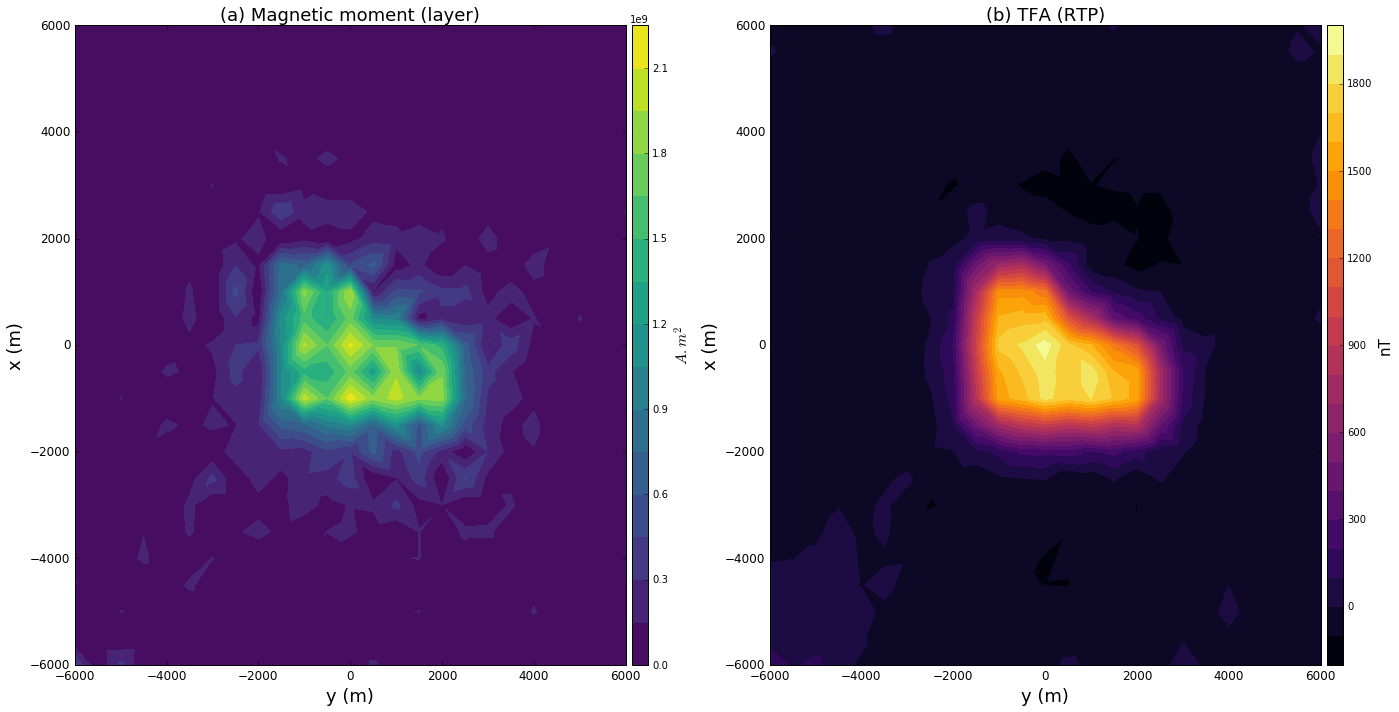

In [39]:
title_font = 18
bottom_font = 15
plt.close('all')
plt.figure(figsize=(20,10), tight_layout=True)

plt.subplot(1,2,1)
plt.tricontourf(ys,xs,m_LM,20,cmap='viridis')
plt.colorbar(pad=0.01, aspect=40, shrink=1.0).set_label('$A.m^2$',size=bottom_font)
plt.xlabel('y (m)', fontsize = title_font)
plt.ylabel('x (m)', fontsize = title_font)
plt.title('(a) Magnetic moment (layer)', fontsize=title_font)
plt.tick_params(axis='both', which='major', labelsize=12)

plt.subplot(1,2,2)
plt.tricontourf(reg_grid['y'],reg_grid['x'], tfa_rtp, 20, cmap='inferno')
plt.colorbar(pad=0.01, aspect=40, shrink=1.0).set_label('nT',size=bottom_font)
plt.xlabel('y (m)', fontsize = title_font)
plt.ylabel('x (m)', fontsize = title_font)
plt.title('(b) TFA (RTP)', fontsize=title_font)
plt.tick_params(axis='both', which='major', labelsize=12)

file_name = 'figs/regular/RTP_moment_LM_NNLS_IM'
plt.savefig(file_name+'.png',dpi=300)
saved_files.append(file_name+'.png')

plt.savefig(file_name+'.eps',dpi=300)
saved_files.append(file_name+'.eps')

plt.show()

## Comparison between the RTP Calculated by equivalent layer and the true RTP field

In [40]:
r_rtp = tfa_rtp - data['tfa_obs_polyprism_PL_reg']

In [41]:
r_norm,r_mean,r_std = fc.residual(tfa_rtp,data['tfa_obs_polyprism_PL_reg'])

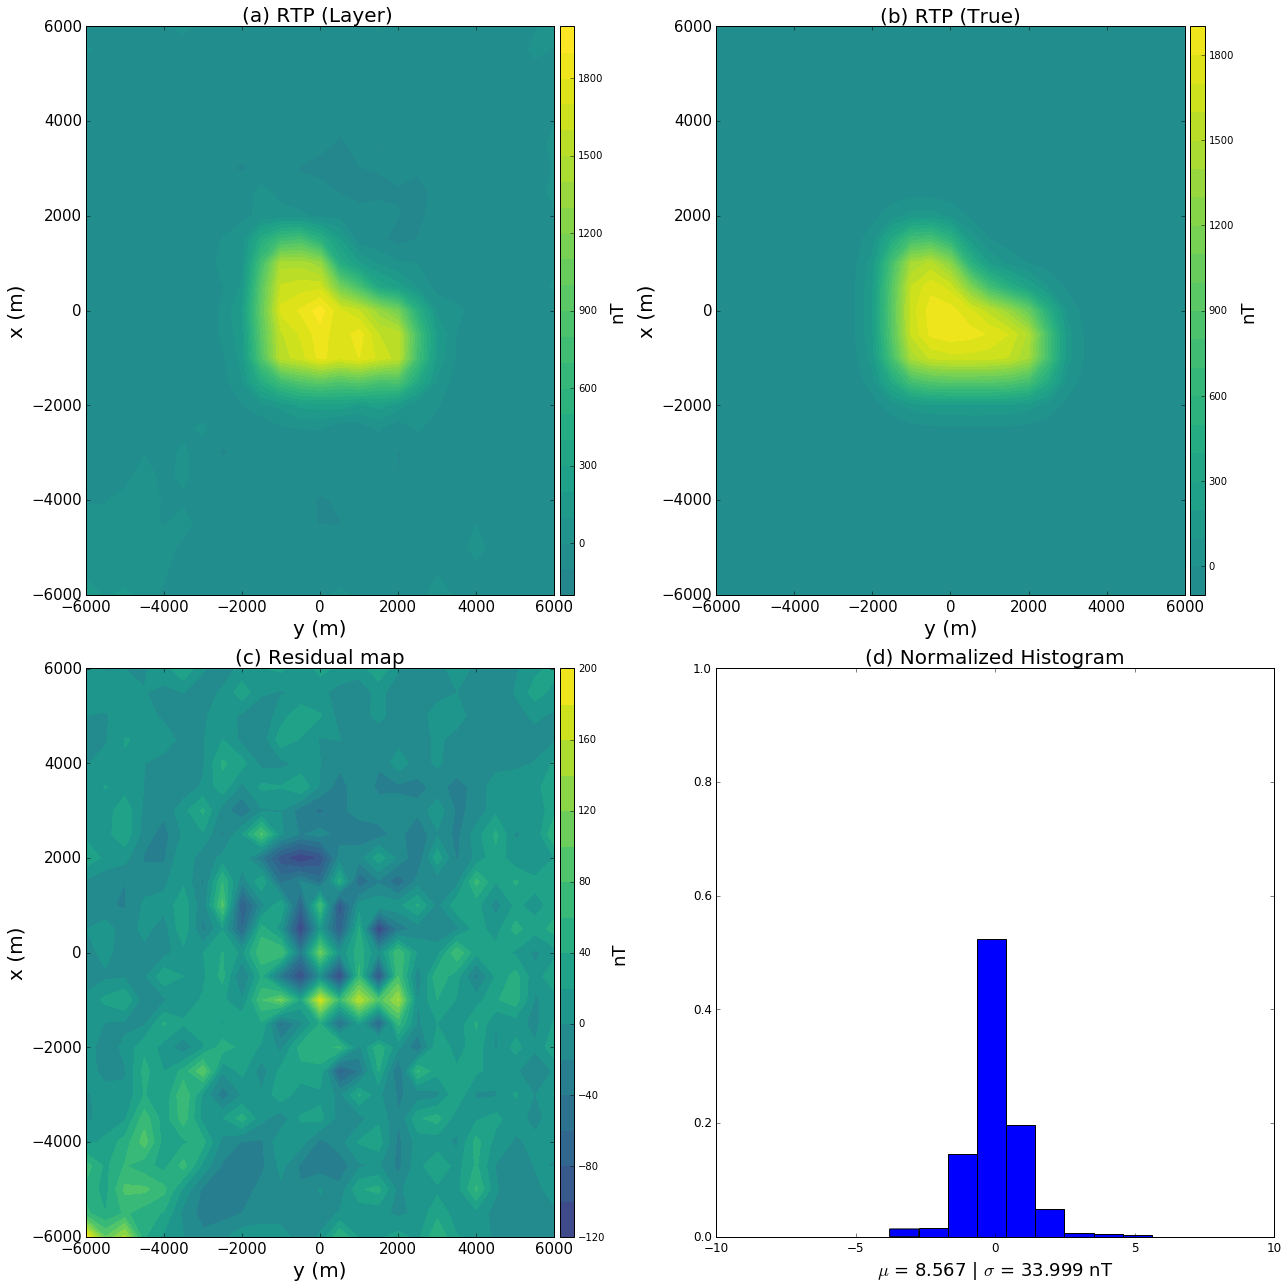

In [42]:
title_font = 20
bottom_font = 18
saturation_factor = 1.
plt.close('all')
plt.figure(figsize=(18,18), tight_layout=True)

ranges = saturation_factor*np.abs([tfa_rtp.max(), tfa_rtp.min(),
                                   data['tfa_obs_polyprism_PL_reg'].max(), data['tfa_obs_polyprism_PL_reg'].min()]).max()

r_ranges = saturation_factor*np.abs([r_rtp.max(), r_rtp.min()]).max()


plt.subplot(2,2,1)
plt.contourf(reg_grid['y'].reshape(reg_grid['shape']),
             reg_grid['x'].reshape(reg_grid['shape']), 
             tfa_rtp.reshape(reg_grid['shape']),
             20, cmap='viridis',vmin=-ranges, vmax=ranges)
plt.colorbar(pad=0.01, aspect=40, shrink=1.0).set_label('nT',size=bottom_font) 
plt.xlabel('y (m)', fontsize = title_font)
plt.ylabel('x (m)', fontsize = title_font)
plt.title('(a) RTP (Layer) ', fontsize=title_font)
plt.tick_params(axis='both', which='major', labelsize=15)

plt.subplot(2,2,2)
plt.contourf(reg_grid['y'].reshape(reg_grid['shape']),
             reg_grid['x'].reshape(reg_grid['shape']),
             data['tfa_obs_polyprism_PL_reg'].reshape(reg_grid['shape']),
             20, cmap='viridis',  vmin=-ranges, vmax=ranges)
plt.colorbar(pad=0.01, aspect=40, shrink=1.0).set_label('nT',size=bottom_font)
plt.xlabel('y (m)', fontsize = title_font)
plt.ylabel('x (m)', fontsize = title_font)
plt.title('(b) RTP (True)', fontsize=title_font)
plt.tick_params(axis='both', which='major', labelsize=15)

plt.subplot(2,2,3)
plt.contourf(reg_grid['y'].reshape(reg_grid['shape']),
             reg_grid['x'].reshape(reg_grid['shape']),
             r_rtp.reshape(reg_grid['shape']), 
             20, cmap='viridis',  vmin=-r_ranges, vmax=r_ranges)
plt.colorbar(pad=0.01, aspect=40, shrink=1.0).set_label('nT',size=bottom_font)
plt.xlabel('y (m)', fontsize = title_font)
plt.ylabel('x (m)', fontsize = title_font)
plt.title('(c) Residual map', fontsize=title_font)
plt.tick_params(axis='both', which='major', labelsize=15)


plt.subplot(2,2,4)
plt.xlabel('$\mu$ = %.3f | $\sigma$ = %.3f nT' % (r_mean, r_std),
           fontsize = bottom_font)
nbins = int((np.max(r_norm - np.min(r_norm))))
plt.hist(r_norm,bins=nbins,normed=True)
plt.ylim(0.,1.)
plt.xlim(-10., 10.)
plt.title('(d) Normalized Histogram',fontsize=title_font)
plt.tick_params(axis='both', which='major', labelsize=12)

file_name = 'figs/regular/rtp_layer_true'
plt.savefig(file_name+'.png',dpi=300)
saved_files.append(file_name+'.png')

plt.savefig(file_name+'.eps',dpi=300)
saved_files.append(file_name+'.eps')

plt.show()

### Results

In [43]:
result_IM_reg['magnetic_moment'] = m_LM
result_IM_reg['inc_est'] = inc_est
result_IM_reg['dec_est'] = dec_est
result_IM_reg['layer_depth'] = h
result_IM_reg['reg_patameter'] = mu_pos
result_IM_reg['RTP'] = tfa_rtp
result_IM_reg['tfa_predicted'] = pred

#### Generating .pickle file

In [44]:
now = datetime.datetime.utcnow().strftime('%d %B %Y %H:%M:%S UTC')
result_IM_reg['metadata'] = 'Generated by {name} on {date}'.format(date=now, name=notebook_name)

In [45]:
file_name = 'data/result_IM_reg.pickle'
with open(file_name, 'w') as f:
    pickle.dump(result_IM_reg, f)
    
saved_files.append(file_name)


### Saved files

In [46]:
with open('reports/report_%s.md' % notebook_name[:st.index(notebook_name, '.')], 'w') as q:
    q.write('# Saved files \n')
    now = datetime.datetime.utcnow().strftime('%d %B %Y %H:%M:%S UTC')
    header = 'Generated by {name} on {date}'.format(date=now, name=notebook_name)
    q.write('\n\n'+header+'\n\n')
    for i, sf in enumerate(saved_files):
        print '%d  %s' % (i+1,sf)
        q.write('*  `%s` \n' % (sf))

1  figs/regular/convergence_LM_NNLS_magIM.png
2  figs/regular/convergence_LM_NNLS_magIM.eps
3  figs/regular/data_fitting_LM_NNLS_magIM.png
4  figs/regular/data_fitting_LM_NNLS_magIM.eps
5  figs/regular/magnetic_moment_positive_LM_NNLS_magIM.png
6  figs/regular/magnetic_moment_positive_LM_NNLS_magIM.eps
7  figs/regular/RTP_reg_grid_magIM.png
8  figs/regular/RTP_reg_grid_magIM.eps
9  figs/regular/RTP_moment_LM_NNLS_IM.png
10  figs/regular/RTP_moment_LM_NNLS_IM.eps
11  figs/regular/rtp_layer_true.png
12  figs/regular/rtp_layer_true.eps
13  data/result_IM_reg.pickle
